<a href="https://colab.research.google.com/github/Joao-vitor1/training-CNNs/blob/main/prova_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 15.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torchvision
import torchvision.transforms as T
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data import Dataset
from torchvision import transforms
import torchmetrics
from torch import nn
from torch.optim.lr_scheduler import StepLR

import tempfile
import os
# import torch.nn as nn



# Dados

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Converte PIL Image para tensor
    transforms.Normalize((0.5,), (0.5,))  # Normaliza com média 0.5 e desvio padrão 0.5
])

In [ ]:
# Baixar e carregar os dados de treino e teste
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',  # Diretório onde os dados serão armazenados
    train=True,     # Indica que é o conjunto de treinamento
    download=True,  # Faz o download se não estiver disponível
    transform=transform
)

test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform)



In [ ]:
#looking for the number of images
print(len(train_dataset))
#get training and validation data
train_ds, val_ds = random_split(train_dataset, [50000, 10000])

60000


In [ ]:
batch_size = 128

train_dl = DataLoader(train_ds, batch_size, shuffle = True, pin_memory = True) # oque eh pin_memory?
val_dl =  DataLoader(val_ds, batch_size, shuffle = False, pin_memory = True)
test_dl = DataLoader(test_dataset, batch_size, shuffle = False, pin_memory = True)

torch.Size([1, 28, 28])


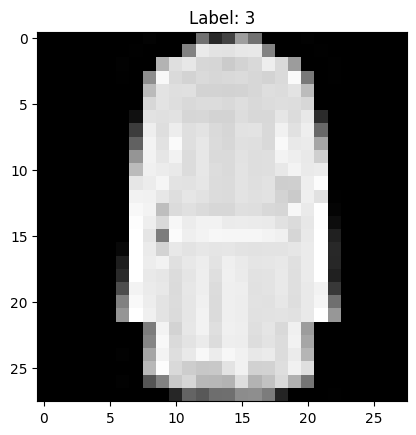

In [ ]:
# Função para mostrar uma imagem
def show_image(img, label):
    img = img / 2 + 0.5  # Desnormaliza
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)), cmap='gray')
    plt.title(f"Label: {label}")
    plt.show()

# Obter uma batch
data_iter = iter(train_dl)
images, labels = next(data_iter)
print(images[0].shape)
# Mostrar a primeira imagem
show_image(images[0], labels[0].item())

# modelos

In [ ]:
#VGG with 4 convolutions
#ativation function: ReLU
#regualization: Dropout
class model1(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_layer = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size = (3,3)), # 16 x 26 x 26
        nn.BatchNorm2d(16),
        nn.ReLU(),

        nn.Conv2d(16, 32, kernel_size = (3,3)), # 32 x 24 x 24
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 16 x 12 X 12


        nn.Conv2d(32, 64, kernel_size = (3,3)), # 64 x 10 X 10
        nn.BatchNorm2d(64),
        nn.ReLU(),

        nn.Conv2d(64,128, kernel_size =(3,3)), # 128 x 8 X 8
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 128 x 4 X 4
    )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(128*4*4, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(1024, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.conv_layer(x)
    return self.linear_layer(x)


In [ ]:
#VGG with 4 convolutions
#ativation function: ReLU
#regualization: Dropout
class model2(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv_layer = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size = (3,3), padding = 1), # 16 x 28 x 28
        nn.BatchNorm2d(16),
        nn.ReLU(),
        #
        nn.Conv2d(16, 32, kernel_size = (3,3), padding = 1), # 32 x 28 x 28
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 16 x 14 X 14


        nn.Conv2d(32, 64, kernel_size = (3,3), padding = 1), # 64 x 14 X 14
        nn.BatchNorm2d(64),
        nn.ReLU(),
        #
        nn.Conv2d(64,128, kernel_size =(3,3), padding = 1), # 128 x 14 X 14
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 128 x 7 X 7
    )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),

        nn.Linear(128*7*7, 1024),
        nn.BatchNorm1d(1024),
        nn.ReLU(),
        nn.Dropout(0.3),

        nn.Linear(1024, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10)
    )
  def forward(self, x):
    x = self.conv_layer(x)
    return self.linear_layer(x)


In [ ]:
#AlexNet with 2 convolutions
#ativation function: LeakyReLU
#regualization: Dropout
class model3(nn.Module):
    def __init__(self) -> None: # o que significa
        super().__init__()
        self.conv_layer = nn.Sequential(
            nn.Conv2d(1,32,3,1), #32 x 26 x 26
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(32), # 32 x 13 x 13

            nn.Conv2d(32,64,3,1), # 64 x 11 x 11
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.BatchNorm2d(64), # 64 x 5 x 5
        )
        self.linear_layer = nn.Sequential(
            nn.Dropout(0.3),
            nn.Linear(64*5*5,128),
            nn.LeakyReLU(),
            nn.BatchNorm1d(128),

            nn.Dropout(0.3),

            nn.Linear(128,64),
            nn.LeakyReLU(),
            nn.BatchNorm1d(64),

            nn.Dropout(0.3),

            nn.Linear(64,10),
            nn.LogSoftmax(dim=1),
        )

    def forward(self,x):
        out = self.conv_layer(x)
        # print(out.shape)
        out = out.view(-1,64*5*5)
        out = self.linear_layer(out)

        return out

In [ ]:
#VGG with 5 convolutions
#ativation function: ReLU
#regualization: Dropout
class model4(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(1,64, kernel_size = (3,3), padding = 1), # 64 x 28 x 28
        nn.ReLU(),
        nn.Conv2d(64,64, kernel_size = (3,3), padding = 1), # 64 x 28 x 28
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 64 x 14 x 14
        nn.BatchNorm2d(64),

        nn.Conv2d(64,128, kernel_size = (3,3), padding = 1), # 128 x 14 x 14
        nn.ReLU(),
        nn.Conv2d(128,128, kernel_size = (3,3), padding = 1), # 128 x 14 x 14
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 128 x 7 x 7
        nn.BatchNorm2d(128),

        nn.Conv2d(128,256, kernel_size = (3,3)), # 256 x 5 x 5
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 256 x 2 x 2
        nn.BatchNorm2d(256)
    )
    self.linear_layer = nn.Sequential(
        nn.Flatten(),

        nn.Linear(256*2*2,512),
        nn.ReLU(),
        nn.Dropout(0.5),

        nn.Linear(512, 10)
    )

  def forward(self, x):
    x = self.conv_layer(x)
    return self.linear_layer(x)

In [ ]:
#cheking if we are running the code in GPU or CPU
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('rodando na', device)

rodando na cuda


# função de treinamento

In [ ]:
def fit(epochs, model, train_dl, val_dl, loss_func, optimizer, decrease):
  #learning rate decreasing in 0.1 at every 6 epochs
  if decrease is True:
    scheduler = StepLR(optimizer, step_size= 6, gamma=0.1)

  history = []
  epoch_info = {'loss_train': 0.0, 'loss_val': 0.0, 'acc': 0.0}

  with tempfile.TemporaryDirectory() as tempdir:
    #creat directory to save parameters
    best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
    torch.save(model.state_dict(), best_model_params_path)
    best_acc = 0.0

    for epoch in range(epochs):
      model.train()        #setting to train mode
      loss_epoch = 0.0
      for imgs, labels in train_dl:
        imgs, labels = imgs.to(device), labels.to(device) #setting imgs and labels in GPU

        out = model(imgs)                 #Forward
        loss = loss_func(out, labels)     #loss function computation

        loss.backward()                   #Backward
        loss_epoch += loss.item()
        optimizer.step()                  #updating parameters
        optimizer.zero_grad()             #resetting gradients
      print('----------------------------------------')

      if decrease is True:
        scheduler.step()

      epoch_info['loss_val'], epoch_info['acc'] = evaluation(model, val_dl, loss_func)
      epoch_info['loss_train'] = loss_epoch / len(train_dl)

      print('epoch:', epoch,
            'loss_train:', epoch_info['loss_train'],
            'loss_val:', epoch_info['loss_val'],
            'acc:', epoch_info['acc'])

      if best_acc < epoch_info['acc']: #creating checkpoint when your model gets better acc
        print('better')
        best_acc = epoch_info['acc']
        torch.save(model.state_dict(), best_model_params_path)


      history.append([epoch_info['loss_train'], epoch_info['loss_val'], epoch_info['acc']])
    #getting model version with best acc score.
    model.load_state_dict(torch.load(best_model_params_path))
  return history


def evaluation(model, val_dl, loss_func):
  model.eval()  #setting to validation mode

  with torch.no_grad(): #No calculation of gradient in forward step
    loss_val = 0.0
    acc = 0.0

    for imgs, labels in val_dl:
      imgs, labels = imgs.to(device), labels.to(device)

      #Forward
      out = model(imgs)
      loss= loss_func(out, labels)
      loss_val += loss.item()

    #calculating accuracy
      _, preds = torch.max(out, dim = 1)
      acc += torch.sum(preds == labels).item() / len(preds)

    loss_val = loss_val / len(val_dl)
    acc = acc / len(val_dl)

  return loss_val, acc

# funções auxiliares

In [ ]:
def acurracy(model, val_dl, classes):
  correct_preds = {name_class: 0 for name_class in classes}
  all_preds = {name_class: 0 for name_class in classes}

  model.eval()

  with torch.no_grad():
    total_correct = 0.0
    total = 0.0
    for imgs, labels in val_dl:
      imgs, labels = imgs.to(device), labels.to(device)

      out = model(imgs)

      _, preds = torch.max(out, dim = 1)

      for pred, label in zip(preds,labels):
          if pred == label:
            correct_preds[label.item()] += 1
            total_correct += 1
          all_preds[label.item()] += 1
          total += 1

    for name in classes:
      class_acc = correct_preds[name] / all_preds[name]
      print("acurracia da classe", str(name),":", class_acc)

    global_acc = total_correct/total
    print('acurracia global:', global_acc)
  return global_acc

In [ ]:
def make_confusion_matrix(model, val_dl):
  model.eval()
  model.to('cpu')
  Preds = []
  Labels = []
  with torch.no_grad():
    for imgs, labels in val_dl:
      out = model(imgs)

      _, preds = torch.max(out, dim = 1)
      Preds = np.concatenate((Preds, preds))
      Labels = np.concatenate((Labels, labels))

  confmat = torchmetrics.ConfusionMatrix(task="multiclass", num_classes=10)
  cm = confmat(torch.tensor(Preds),torch.tensor(Labels))

  plt.title("Confusion Matrix")
  sns.heatmap(cm,annot=True,fmt='d')
  plt.xlabel("Predictions")
  plt.ylabel("Ground Truth")
  plt.show()
  model.to(device)

In [ ]:
def plot_loss(history):
  history = np.array(history)
  loss_train = history[:,0]
  loss_val = history[:,1]

  plt.title('loss model X epoch')
  plt.plot(loss_train, label ="loss train")
  plt.plot(loss_val, label = 'loss validation')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("loss")


def plot_acc(history):
  history = np.array(history)
  acc = history[:, 2]

  plt.title('accuracy X epoch')
  plt.plot(acc, label ="accuracy")
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()



In [ ]:
def plot_all_acc(historical):
  for i, history in enumerate(historical):
    history = np.array(history)
    acc = history[:, 2]

    plt.plot(acc, label = "accuracy"+str(i))
  plt.title('accuracy X epoch')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.show()


def plot_all_loss(historical):
  for i, history in enumerate(historical):
    history = np.array(history)
    loss_train = history[:,0]

    plt.plot(loss_train, label = 'loss train'+str(i))
  plt.title('loss model X epoch')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()

  for i, history in enumerate(historical):
      history = np.array(history)
      loss_val = history[:,1]

      plt.plot(loss_val, label ="loss val"+str(i))
  plt.title('loss model X epoch')
  plt.legend(fontsize="12")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.show()


In [ ]:
lossfunc = nn.CrossEntropyLoss()

model_1 = model1().to(device)
model_2 = model2().to(device)
model_3 = model3().to(device)
model_4 = model4().to(device)

print(evaluation(model_1, val_dl, lossfunc))
print(evaluation(model_2, val_dl, lossfunc))
print(evaluation(model_3, val_dl, lossfunc))
print(evaluation(model_4, val_dl, lossfunc))

(2.302565369424941, 0.09958465189873418)
(2.302751894238629, 0.13993275316455697)
(2.3045232507246958, 0.10096914556962025)
(2.303002100956591, 0.13933939873417722)


# iniciando treinamento

In [ ]:
Model1_0 = model1().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model1_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history1_0 = fit(num_epoch, Model1_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.4815594713248865 loss_val: 0.31458136458185654 acc: 0.8850870253164557
better
----------------------------------------
epoch: 1 loss_train: 0.2728113827421842 loss_val: 0.27149949647203275 acc: 0.9023931962025317
better
----------------------------------------
epoch: 2 loss_train: 0.21248166914791097 loss_val: 0.2651802684310116 acc: 0.9052610759493671
better
----------------------------------------
epoch: 3 loss_train: 0.16426971727205664 loss_val: 0.2572019710382329 acc: 0.9094145569620253
better
----------------------------------------
epoch: 4 loss_train: 0.12397712545321725 loss_val: 0.25933805230674867 acc: 0.9119857594936709
better
----------------------------------------
epoch: 5 loss_train: 0.09203074244148743 loss_val: 0.2809094375447382 acc: 0.9090189873417721
----------------------------------------
epoch: 6 loss_train: 0.06895416604397851 loss_val: 0.3021744540597819 acc: 0.9071400316455697
-------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model1_1 = model1().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.Adam(Model1_1.parameters(), lr = lr, weight_decay = 0.0001)
lossfunc = nn.CrossEntropyLoss()


history1_1 = fit(num_epoch, Model1_1, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 0.3662337819709802 loss_val: 0.270533552086806 acc: 0.9013053797468354
better
----------------------------------------
epoch: 1 loss_train: 0.24400730572088294 loss_val: 0.23275638956435118 acc: 0.9158425632911392
better
----------------------------------------
epoch: 2 loss_train: 0.20238641533247956 loss_val: 0.2483230495377432 acc: 0.9075356012658228
----------------------------------------
epoch: 3 loss_train: 0.17619716818146694 loss_val: 0.22982798639354826 acc: 0.9153481012658228
----------------------------------------
epoch: 4 loss_train: 0.15148961450666418 loss_val: 0.23269923219952401 acc: 0.917128164556962
better
----------------------------------------
epoch: 5 loss_train: 0.13451046723386514 loss_val: 0.23101115189021146 acc: 0.9174248417721519
better
----------------------------------------
epoch: 6 loss_train: 0.11409346254833062 loss_val: 0.2588684921023212 acc: 0.9126780063291139
--------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model1_2 = model1().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.SGD(Model1_2.parameters(), lr = lr, weight_decay = 0.00001, momentum=0.9)

lossfunc = nn.CrossEntropyLoss()


history1_2 = fit(num_epoch, Model1_2, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 1.3314634691114011 loss_val: 0.8616240945043443 acc: 0.7460443037974683
better
----------------------------------------
epoch: 1 loss_train: 0.77526476026496 loss_val: 0.6762284138534642 acc: 0.7785799050632911
better
----------------------------------------
epoch: 2 loss_train: 0.6522618833252841 loss_val: 0.5934157639364653 acc: 0.7986550632911392
better
----------------------------------------
epoch: 3 loss_train: 0.5832844612086215 loss_val: 0.5405217971228347 acc: 0.8161590189873418
better
----------------------------------------
epoch: 4 loss_train: 0.5339774555714843 loss_val: 0.49986381394953666 acc: 0.8300039556962026
better
----------------------------------------
epoch: 5 loss_train: 0.4957826757217612 loss_val: 0.4660551121717767 acc: 0.8419699367088608
better
----------------------------------------
epoch: 6 loss_train: 0.4664657724940259 loss_val: 0.4399980638600603 acc: 0.8493868670886076
better
--------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model1_3 = model1().to(device)
num_epoch = 8
lr = 0.005
opt_func = torch.optim.SGD(Model1_3.parameters(), lr = lr, weight_decay = 0.0001, momentum=0.99)
lossfunc = nn.CrossEntropyLoss()

history1_3 = fit(num_epoch, Model1_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.4841515286956602 loss_val: 0.46409394129922116 acc: 0.8404865506329114
better
----------------------------------------
epoch: 1 loss_train: 0.2936364093323803 loss_val: 0.27145038714891745 acc: 0.8994264240506329
better
----------------------------------------
epoch: 2 loss_train: 0.24552896860844034 loss_val: 0.24009072912644736 acc: 0.9124802215189873
better
----------------------------------------
epoch: 3 loss_train: 0.2098484009580539 loss_val: 0.22681769247673736 acc: 0.9174248417721519
better
----------------------------------------
epoch: 4 loss_train: 0.18633934264750127 loss_val: 0.23015154954753345 acc: 0.9150514240506329
----------------------------------------
epoch: 5 loss_train: 0.15832554828137388 loss_val: 0.22150414210708835 acc: 0.9233583860759493
better
----------------------------------------
epoch: 6 loss_train: 0.14055635260842037 loss_val: 0.2299291854606399 acc: 0.9198971518987342
-----------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model2_0 = model2().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model2_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()

history2_0 = fit(num_epoch, Model2_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------

----------------------------------------
epoch: 0 loss_train: 0.38358735134991845 loss_val: 0.2654888373387011 acc: 0.9037776898734177
better
----------------------------------------
epoch: 1 loss_train: 0.21272836844710744 loss_val: 0.241043150236335 acc: 0.9107001582278481
better
----------------------------------------
epoch: 2 loss_train: 0.1425914918465535 loss_val: 0.24656281101552746 acc: 0.9104034810126582
----------------------------------------
epoch: 3 loss_train: 0.09321429107404883 loss_val: 0.23985171874489966 acc: 0.919501582278481
better
----------------------------------------
epoch: 4 loss_train: 0.05803519074836046 loss_val: 0.2624897605067567 acc: 0.9180181962025317
----------------------------------------
epoch: 5 loss_train: 0.037075161043068634 loss_val: 0.3137613389688202 acc: 0.9106012658227848
----------------------------------------
epoch: 6 loss_train: 0.026432995653480215 loss_val: 0.3008490338732925 acc: 0.916435917721519
----------------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model2_1 = model2().to(device)
num_epoch = 8
lr = 0.0005
opt_func = torch.optim.Adam(Model2_1.parameters(), lr = lr, weight_decay = 0.00005)
lossfunc = nn.CrossEntropyLoss()


history2_1 = fit(num_epoch, Model2_1, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 0.33169477392950325 loss_val: 0.24718485150156141 acc: 0.9073378164556962
better
----------------------------------------
epoch: 1 loss_train: 0.21032377951742742 loss_val: 0.21991729066718982 acc: 0.9180181962025317
better
----------------------------------------
epoch: 2 loss_train: 0.16421889134532655 loss_val: 0.21501214236398286 acc: 0.9228639240506329
better
----------------------------------------
epoch: 3 loss_train: 0.12901260429407324 loss_val: 0.23813041714550573 acc: 0.9119857594936709
----------------------------------------
epoch: 4 loss_train: 0.09854601303120251 loss_val: 0.2315431196666971 acc: 0.9194026898734177
----------------------------------------
epoch: 5 loss_train: 0.07824642907189744 loss_val: 0.3228183865924425 acc: 0.9024920886075949
----------------------------------------
epoch: 6 loss_train: 0.0623734746476078 loss_val: 0.2552337093821055 acc: 0.920193829113924
--------------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model2_2 = model2().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.Adam(Model2_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history2_2 = fit(num_epoch, Model2_2, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.3242461692417979 loss_val: 0.2581100051727476 acc: 0.9004153481012658
better
----------------------------------------
epoch: 1 loss_train: 0.21569075938457113 loss_val: 0.20953958453256874 acc: 0.9223694620253164
better
----------------------------------------
epoch: 2 loss_train: 0.17032533415290704 loss_val: 0.201986002582538 acc: 0.9221716772151899
----------------------------------------
epoch: 3 loss_train: 0.139163161539818 loss_val: 0.2056980001021035 acc: 0.9299841772151899
better
----------------------------------------
epoch: 4 loss_train: 0.10674191578803464 loss_val: 0.19713053748577455 acc: 0.931368670886076
better
----------------------------------------
epoch: 5 loss_train: 0.08690103296847905 loss_val: 0.21717260928848123 acc: 0.9282041139240507
----------------------------------------
epoch: 6 loss_train: 0.06764113919838044 loss_val: 0.23504130712038354 acc: 0.9277096518987342
----------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model2_3 = model2().to(device)
num_epoch = 8
lr = 0.01
opt_func = torch.optim.SGD(Model2_3.parameters(), lr = lr,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history2_3 = fit(num_epoch, Model2_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.37384456680025285 loss_val: 0.3003068341861797 acc: 0.8879549050632911
better
----------------------------------------
epoch: 1 loss_train: 0.22732099879275808 loss_val: 0.2265418749066848 acc: 0.915743670886076
better
----------------------------------------
epoch: 2 loss_train: 0.1794353227900422 loss_val: 0.21919845054044 acc: 0.920193829113924
better
----------------------------------------
epoch: 3 loss_train: 0.14482411526886704 loss_val: 0.2024669081349916 acc: 0.9270174050632911
better
----------------------------------------
epoch: 4 loss_train: 0.11196625920112634 loss_val: 0.2321473924985415 acc: 0.9208860759493671
----------------------------------------
epoch: 5 loss_train: 0.08729066361513589 loss_val: 0.21706097752233094 acc: 0.9244462025316456
----------------------------------------
epoch: 6 loss_train: 0.06438753920633469 loss_val: 0.22886967795747745 acc: 0.9282041139240507
better
-----------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model3_0 = model3().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model3_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history3_0 = fit(num_epoch, Model3_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------

----------------------------------------
epoch: 0 loss_train: 0.9838604800536505 loss_val: 0.5777796333349203 acc: 0.8244659810126582
better
----------------------------------------
epoch: 1 loss_train: 0.5747149146121481 loss_val: 0.4225424826145172 acc: 0.8635284810126582
better
----------------------------------------
epoch: 2 loss_train: 0.4573280685545538 loss_val: 0.3660302277230009 acc: 0.8723299050632911
better
----------------------------------------
epoch: 3 loss_train: 0.40109169132569256 loss_val: 0.32588338795342026 acc: 0.885878164556962
better
----------------------------------------
epoch: 4 loss_train: 0.3655245261805137 loss_val: 0.3076619745432576 acc: 0.8908227848101266
better
----------------------------------------
epoch: 5 loss_train: 0.3410189083927428 loss_val: 0.2925731111553651 acc: 0.8970530063291139
better
----------------------------------------
epoch: 6 loss_train: 0.32148565515837707 loss_val: 0.2798930987527099 acc: 0.9017009493670886
better
-----------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model3_1 = model3().to(device)
num_epoch = 6
lr = 0.000015
opt_func = torch.optim.Adam(Model3_1.parameters(), lr = lr,  weight_decay = 0.000001)
lossfunc = nn.CrossEntropyLoss()


history3_1 = fit(num_epoch, Model3_1, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 1.5905656064562785 loss_val: 1.083111714713181 acc: 0.732693829113924
better
----------------------------------------
epoch: 1 loss_train: 1.0901844112769417 loss_val: 0.8762676821479315 acc: 0.7657238924050633
better
----------------------------------------
epoch: 2 loss_train: 0.9253255522159665 loss_val: 0.762474078166334 acc: 0.7877768987341772
better
----------------------------------------
epoch: 3 loss_train: 0.8253276125549356 loss_val: 0.6775480259822894 acc: 0.802314082278481
better
----------------------------------------
epoch: 4 loss_train: 0.7496044661687769 loss_val: 0.6198462700542016 acc: 0.8164556962025317
better
----------------------------------------
epoch: 5 loss_train: 0.6933036268214741 loss_val: 0.5675196662733827 acc: 0.8293117088607594
better


<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model3_2 = model3().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model3_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history3_2 = fit(num_epoch, Model3_2, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 0.9719193919235484 loss_val: 0.5652795283100273 acc: 0.8283227848101266
better
----------------------------------------
epoch: 1 loss_train: 0.5555823385105718 loss_val: 0.40435720923580704 acc: 0.8687697784810127
better
----------------------------------------
epoch: 2 loss_train: 0.44059008817233697 loss_val: 0.3471694705607016 acc: 0.8815268987341772
better
----------------------------------------
epoch: 3 loss_train: 0.3880011362340444 loss_val: 0.31472186499004123 acc: 0.8894382911392406
better
----------------------------------------
epoch: 4 loss_train: 0.3520289332513004 loss_val: 0.2994421088620077 acc: 0.893690664556962
better
----------------------------------------
epoch: 5 loss_train: 0.3280447730246712 loss_val: 0.28058939568604097 acc: 0.9014042721518988
better
----------------------------------------
epoch: 6 loss_train: 0.31170128613634185 loss_val: 0.2695514422051514 acc: 0.9046677215189873
better
---------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model4_0 = model4().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model4_0.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_0 = fit(num_epoch, Model4_0, train_dl, val_dl, lossfunc, opt_func, False)
# -------------------------- PADRÃO ----------------------------------------------------------
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.4994882327287703 loss_val: 0.3304612176327766 acc: 0.8781645569620253
better
----------------------------------------
epoch: 1 loss_train: 0.2780047290960846 loss_val: 0.25816336170404774 acc: 0.9058544303797469
better
----------------------------------------
epoch: 2 loss_train: 0.22138555208816552 loss_val: 0.23280378534824034 acc: 0.9139636075949367
better
----------------------------------------
epoch: 3 loss_train: 0.18079834033156295 loss_val: 0.2289209148929089 acc: 0.9172270569620253
better
----------------------------------------
epoch: 4 loss_train: 0.14646702043502532 loss_val: 0.2175370380282402 acc: 0.9213805379746836
better
----------------------------------------
epoch: 5 loss_train: 0.11716294067595011 loss_val: 0.22531672501111333 acc: 0.9189082278481012
----------------------------------------
epoch: 6 loss_train: 0.08907559217737458 loss_val: 0.2375830948541436 acc: 0.9196004746835443
-------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model4_1 = model4().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.SGD(Model4_1.parameters(), lr = lr, weight_decay = 0.00001,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history4_1 = fit(num_epoch, Model4_1, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 0.7938619434376202 loss_val: 0.4846346706529207 acc: 0.8295094936708861
better
----------------------------------------
epoch: 1 loss_train: 0.43591919861486195 loss_val: 0.37597478643248355 acc: 0.8653085443037974
better
----------------------------------------
epoch: 2 loss_train: 0.35798155125754566 loss_val: 0.33150467144537576 acc: 0.8826147151898734
better
----------------------------------------
epoch: 3 loss_train: 0.3154204430635018 loss_val: 0.31340483906148353 acc: 0.8868670886075949
better
----------------------------------------
epoch: 4 loss_train: 0.2866864311496925 loss_val: 0.2823080005525034 acc: 0.8978441455696202
better
----------------------------------------
epoch: 5 loss_train: 0.264505061995038 loss_val: 0.2760078803270678 acc: 0.8995253164556962
better
----------------------------------------
epoch: 6 loss_train: 0.24588428281457222 loss_val: 0.2762512357174596 acc: 0.9003164556962026
better
--------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model4_2 = model4().to(device)
num_epoch = 8
lr = 0.001
opt_func = torch.optim.Adam(Model4_2.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_2 = fit(num_epoch, Model4_2, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 0.3923589107020737 loss_val: 0.27408684903307806 acc: 0.8968552215189873
better
----------------------------------------
epoch: 1 loss_train: 0.24550094973781836 loss_val: 0.26309288623212257 acc: 0.9029865506329114
better
----------------------------------------
epoch: 2 loss_train: 0.20620182379508567 loss_val: 0.252994412296935 acc: 0.9142602848101266
better
----------------------------------------
epoch: 3 loss_train: 0.17333704435154604 loss_val: 0.20897926795708982 acc: 0.924940664556962
better
----------------------------------------
epoch: 4 loss_train: 0.14474654750293478 loss_val: 0.21835219011276583 acc: 0.9233583860759493
----------------------------------------
epoch: 5 loss_train: 0.12297265678453628 loss_val: 0.19887600527911248 acc: 0.9314675632911392
better
----------------------------------------
epoch: 6 loss_train: 0.10791309191690535 loss_val: 0.20875833928585052 acc: 0.9323575949367089
better
----------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model4_3 = model4().to(device)
num_epoch = 8
lr = 0.0001
opt_func = torch.optim.Adam(Model4_3.parameters(), lr = lr, weight_decay = 0.0001)
lossfunc = nn.CrossEntropyLoss()


history4_3 = fit(num_epoch, Model4_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.5015099723168346 loss_val: 0.30880520275876494 acc: 0.8870648734177216
better
----------------------------------------
epoch: 1 loss_train: 0.27713957905312026 loss_val: 0.2664127981738199 acc: 0.9021954113924051
better
----------------------------------------
epoch: 2 loss_train: 0.21959055516192372 loss_val: 0.24648800030162063 acc: 0.9088212025316456
better
----------------------------------------
epoch: 3 loss_train: 0.18093725056637583 loss_val: 0.23001488477368898 acc: 0.9168314873417721
better
----------------------------------------
epoch: 4 loss_train: 0.14703344401267485 loss_val: 0.2182710147168063 acc: 0.9217761075949367
better
----------------------------------------
epoch: 5 loss_train: 0.11672743453699 loss_val: 0.22787654795978643 acc: 0.9193037974683544
----------------------------------------
epoch: 6 loss_train: 0.09007337662246069 loss_val: 0.22942616488737397 acc: 0.9221716772151899
better
------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


# treinando por mais epocas

In [ ]:
Model2_2 = model2().to(device)
num_epoch = 20
lr = 0.001
opt_func = torch.optim.Adam(Model2_2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history2_2 = fit(num_epoch, Model2_2, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.05746369967665857 loss_val: 0.2619622795830799 acc: 0.9311708860759493
better
----------------------------------------
epoch: 1 loss_train: 0.04341636533560732 loss_val: 0.25119559188620955 acc: 0.9322587025316456
better
----------------------------------------
epoch: 2 loss_train: 0.03574885466062199 loss_val: 0.26885008330963833 acc: 0.9306764240506329
----------------------------------------
epoch: 3 loss_train: 0.030157701174259338 loss_val: 0.27147099088075793 acc: 0.9347310126582279
better
----------------------------------------
epoch: 4 loss_train: 0.02691608557300142 loss_val: 0.31383110257455066 acc: 0.9315664556962026
----------------------------------------
epoch: 5 loss_train: 0.024499731475089576 loss_val: 0.3108835081699528 acc: 0.930379746835443
----------------------------------------
epoch: 6 loss_train: 0.022259046811589023 loss_val: 0.31631740541020525 acc: 0.9314675632911392
---------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model4_2_V2 = model4().to(device)
num_epoch = 20
lr = 0.001
opt_func = torch.optim.Adam(Model4_2.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_2 = fit(num_epoch, Model4_2, train_dl, val_dl, lossfunc, opt_func, False)

----------------------------------------
epoch: 0 loss_train: 0.10098662171655756 loss_val: 0.24261677604687365 acc: 0.9295886075949367
better
----------------------------------------
epoch: 1 loss_train: 0.07549241828539259 loss_val: 0.2621035468351992 acc: 0.9315664556962026
better
----------------------------------------
epoch: 2 loss_train: 0.0665647956254461 loss_val: 0.2639633231336557 acc: 0.9286985759493671
----------------------------------------
epoch: 3 loss_train: 0.05542986024328319 loss_val: 0.2813562206641028 acc: 0.9291930379746836
----------------------------------------
epoch: 4 loss_train: 0.05345278788034035 loss_val: 0.28509134252237367 acc: 0.9314675632911392
----------------------------------------
epoch: 5 loss_train: 0.046324430359884754 loss_val: 0.3387612290208853 acc: 0.9285996835443038
----------------------------------------
epoch: 6 loss_train: 0.046993752555621555 loss_val: 0.32168854650440093 acc: 0.9308742088607594
-------------------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model2_3 = model2().to(device)
num_epoch = 20
lr = 0.01
opt_func = torch.optim.SGD(Model2_3.parameters(), lr = lr,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history2_3 = fit(num_epoch, Model2_3, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.3698394145349712 loss_val: 0.2715723718268962 acc: 0.9004153481012658
better
----------------------------------------
epoch: 1 loss_train: 0.22426107607762832 loss_val: 0.21742743753556965 acc: 0.9173259493670886
better
----------------------------------------
epoch: 2 loss_train: 0.17466064494893985 loss_val: 0.2234706597614892 acc: 0.9169303797468354
----------------------------------------
epoch: 3 loss_train: 0.14009162632133954 loss_val: 0.22794943038798585 acc: 0.9166337025316456
----------------------------------------
epoch: 4 loss_train: 0.11092429669083231 loss_val: 0.23162051346860354 acc: 0.9191060126582279
better
----------------------------------------
epoch: 5 loss_train: 0.0837842719653226 loss_val: 0.22223794328261026 acc: 0.9263251582278481
better
----------------------------------------
epoch: 6 loss_train: 0.06191264408762041 loss_val: 0.23865926350596584 acc: 0.923556170886076
-------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


# Modelo definitivo

In [ ]:
Model2_2_V2 = model2().to(device)
num_epoch = 20
lr = 0.001
opt_func = torch.optim.Adam(Model2_2_V2.parameters(), lr = lr)
lossfunc = nn.CrossEntropyLoss()


history2_2 = fit(num_epoch, Model2_2_V2, train_dl, val_dl, lossfunc, opt_func, True)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.3373521500460022 loss_val: 0.26214363020432147 acc: 0.9003164556962026
better
----------------------------------------
epoch: 1 loss_train: 0.2191953107028666 loss_val: 0.22051455014491383 acc: 0.9153481012658228
better
----------------------------------------
epoch: 2 loss_train: 0.1776518808568225 loss_val: 0.21068919978187053 acc: 0.9178204113924051
better
----------------------------------------
epoch: 3 loss_train: 0.14413407978499332 loss_val: 0.22604752209367632 acc: 0.9206882911392406
better
----------------------------------------
epoch: 4 loss_train: 0.11444612233744711 loss_val: 0.23025561105224152 acc: 0.9194026898734177
----------------------------------------
epoch: 5 loss_train: 0.09299153695478464 loss_val: 0.2261603175650669 acc: 0.9259295886075949
better
----------------------------------------
epoch: 6 loss_train: 0.04071298797193276 loss_val: 0.21046506434301787 acc: 0.9345332278481012
better
----------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model4_2_V2 = model4().to(device)
num_epoch = 20
lr = 0.001
opt_func = torch.optim.Adam(Model4_2_V2.parameters(), lr = lr, weight_decay = 0.00001)
lossfunc = nn.CrossEntropyLoss()


history4_2 = fit(num_epoch, Model4_2_V2, train_dl, val_dl, lossfunc, opt_func, True)

----------------------------------------
epoch: 0 loss_train: 0.3920382212876054 loss_val: 0.2759830108549021 acc: 0.8998219936708861
better
----------------------------------------
epoch: 1 loss_train: 0.2520638549381205 loss_val: 0.2337794984820523 acc: 0.9119857594936709
better
----------------------------------------
epoch: 2 loss_train: 0.21470068656193936 loss_val: 0.21978740790222265 acc: 0.9197982594936709
better
----------------------------------------
epoch: 3 loss_train: 0.17712481449479642 loss_val: 0.20562703143569488 acc: 0.9258306962025317
better
----------------------------------------
epoch: 4 loss_train: 0.1513130714368942 loss_val: 0.20057308881343167 acc: 0.9295886075949367
better
----------------------------------------
epoch: 5 loss_train: 0.1261041434791387 loss_val: 0.19582416343538067 acc: 0.9329509493670886
better
----------------------------------------
epoch: 6 loss_train: 0.07035769463118995 loss_val: 0.18684017710104772 acc: 0.9392800632911392
better
-----

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


In [ ]:
Model2_3_V2 = model2().to(device)
num_epoch = 20
lr = 0.01
opt_func = torch.optim.SGD(Model2_3_V2.parameters(), lr = lr,  momentum=0.80)
lossfunc = nn.CrossEntropyLoss()


history2_3 = fit(num_epoch, Model2_3_V2, train_dl, val_dl, lossfunc, opt_func, False)
#aprovado

----------------------------------------
epoch: 0 loss_train: 0.3820728177914534 loss_val: 0.2997528288183333 acc: 0.8897349683544303
better
----------------------------------------
epoch: 1 loss_train: 0.22920998462173334 loss_val: 0.226251071766962 acc: 0.916435917721519
better
----------------------------------------
epoch: 2 loss_train: 0.1750389016459665 loss_val: 0.201166187283359 acc: 0.9283030063291139
better
----------------------------------------
epoch: 3 loss_train: 0.14023916865401256 loss_val: 0.22309992896227898 acc: 0.9206882911392406
----------------------------------------
epoch: 4 loss_train: 0.1094938345977565 loss_val: 0.21052489222227772 acc: 0.9279074367088608
----------------------------------------
epoch: 5 loss_train: 0.0818132812352589 loss_val: 0.23727602153262006 acc: 0.9237539556962026
----------------------------------------
epoch: 6 loss_train: 0.058978776578479414 loss_val: 0.24871003269394742 acc: 0.9217761075949367
------------------------------------

<ipython-input-11-814a6702a7c2>:49: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_params_path))


# análise

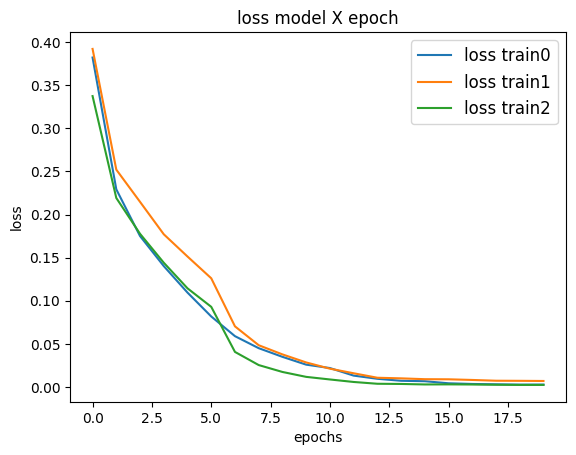

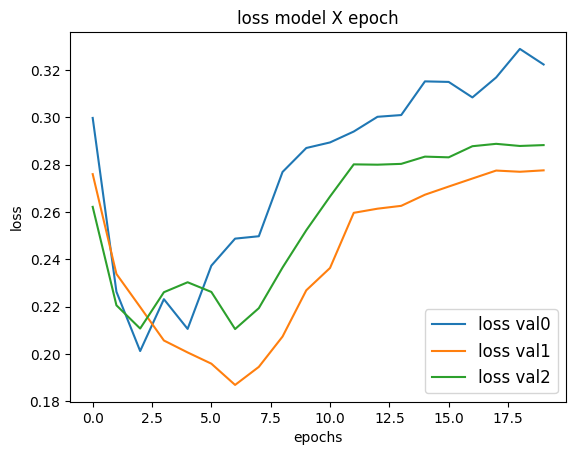

In [ ]:
historical = [history2_3, history4_2, history2_2]

plot_all_loss(historical)

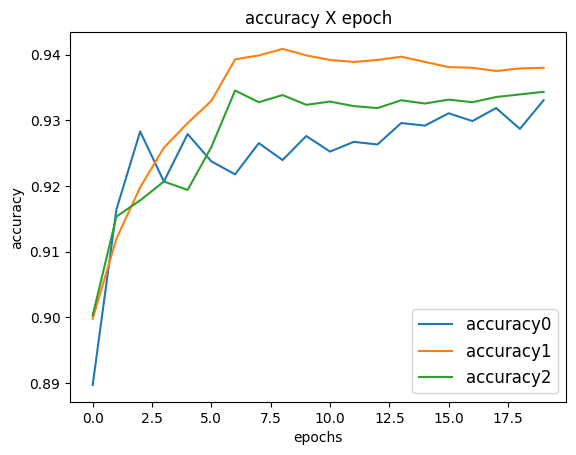

In [ ]:
plot_all_acc(historical)

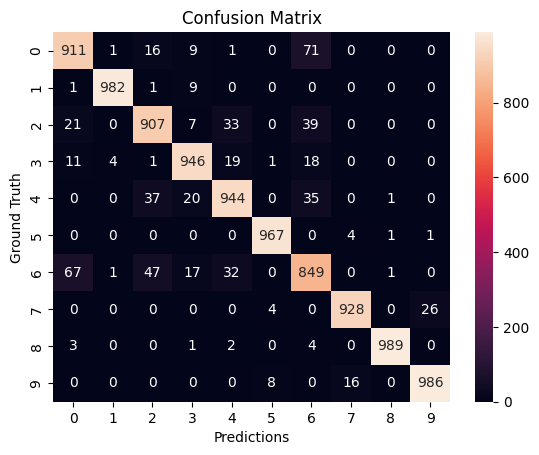

In [ ]:
#matrix de confusão
make_confusion_matrix(Model4_2_V2, val_dl)

0 T-shirt/top

1 Trouser

2 Pullover

3 Dress

4 Coat

5 Sandal

6 Shirt

7 Sneaker

8 Bag

9 Ankle boot

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]

acurracy(Model4_2_V2, test_dl, classes)

acurracia da classe 0 : 0.893
acurracia da classe 1 : 0.988
acurracia da classe 2 : 0.908
acurracia da classe 3 : 0.94
acurracia da classe 4 : 0.916
acurracia da classe 5 : 0.983
acurracia da classe 6 : 0.787
acurracia da classe 7 : 0.974
acurracia da classe 8 : 0.988
acurracia da classe 9 : 0.974
acurracia global: 0.9351


0.9351

# comitê de modelos

In [ ]:
models = [Model4_2_V2, Model2_3_V2,Model2_2_V2]

from statistics import multimode

def assembing(models, val_data, classes):
  #construindo vetor de predições
  predictions = []
  cont = 0
  Label = torch.tensor([])
  for model in models:

    Pred_model = torch.tensor([])
    model.eval()
    with torch.no_grad():
      for imgs, labels in val_data:
        if cont == 0:
          Label = torch.cat((Label, labels))

        imgs, labels = imgs.to(device), labels.to(device)

        out = model(imgs)
        _, preds = torch.max(out, dim = 1)

        Pred_model = torch.cat((Pred_model, preds.to('cpu')))
    cont+=1

    predictions.append(np.array(Pred_model))
  predictions = np.transpose(predictions)
  resposta = []

  for i in predictions:
     moda = multimode(i)
     #Em casos de empates, sempre pegar o primeiro valor da lista
     resposta.append(moda[0])


  correct_preds = {name_class: 0 for name_class in classes}
  all_preds = {name_class: 0 for name_class in classes}
  total_correct = 0.0
  total = 0.0

  for pred, label in zip(resposta,Label):

    if pred == label:
      correct_preds[classes[int(label)]] += 1
      total_correct += 1
    all_preds[classes[int(label)]] += 1
    total += 1

  for name in classes:
    class_acc = correct_preds[name] / all_preds[name]
    print("acurracia da classe", str(name),":", class_acc)

  global_acc = total_correct/total
  print('acurracia global:', global_acc)

In [ ]:
classes = [0,1,2,3,4,5,6,7,8,9]
acurracy(Model4_2_V2, test_dl, classes)
assembing(models, test_dl,classes)

acurracia da classe 0 : 0.893
acurracia da classe 1 : 0.988
acurracia da classe 2 : 0.908
acurracia da classe 3 : 0.94
acurracia da classe 4 : 0.916
acurracia da classe 5 : 0.983
acurracia da classe 6 : 0.787
acurracia da classe 7 : 0.974
acurracia da classe 8 : 0.988
acurracia da classe 9 : 0.974
acurracia global: 0.9351
acurracia da classe 0 : 0.893
acurracia da classe 1 : 0.988
acurracia da classe 2 : 0.914
acurracia da classe 3 : 0.953
acurracia da classe 4 : 0.922
acurracia da classe 5 : 0.986
acurracia da classe 6 : 0.802
acurracia da classe 7 : 0.986
acurracia da classe 8 : 0.989
acurracia da classe 9 : 0.974
acurracia global: 0.9407


In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 9.9 MB/s eta 0:00:00


# f1 Score

In [ ]:
from sklearn.metrics import f1_score

def f1_score(model, val_dl, classes):
  model.eval()
  f1 = 0.0
  count = 0
  with torch.no_grad():
    total_correct = 0.0
    total = 0.0
    for imgs, labels in val_dl:
      imgs, labels = imgs.to(device), labels.to(device)

      out = model(imgs)

      _, preds = torch.max(out, dim = 1)

      f1 += f1_score(labels, preds, average='binary')
      count += 1

    f1 = f1/count

    print('f1 global:', f1)
  return f1



TypeError: F1Score.__new__() missing 1 required positional argument: 'task'